WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, alpha_group1, alpha_group2, Group 1 SD, Group 2 SD]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.
Sampling: [Group 1 data, Group 2 data]


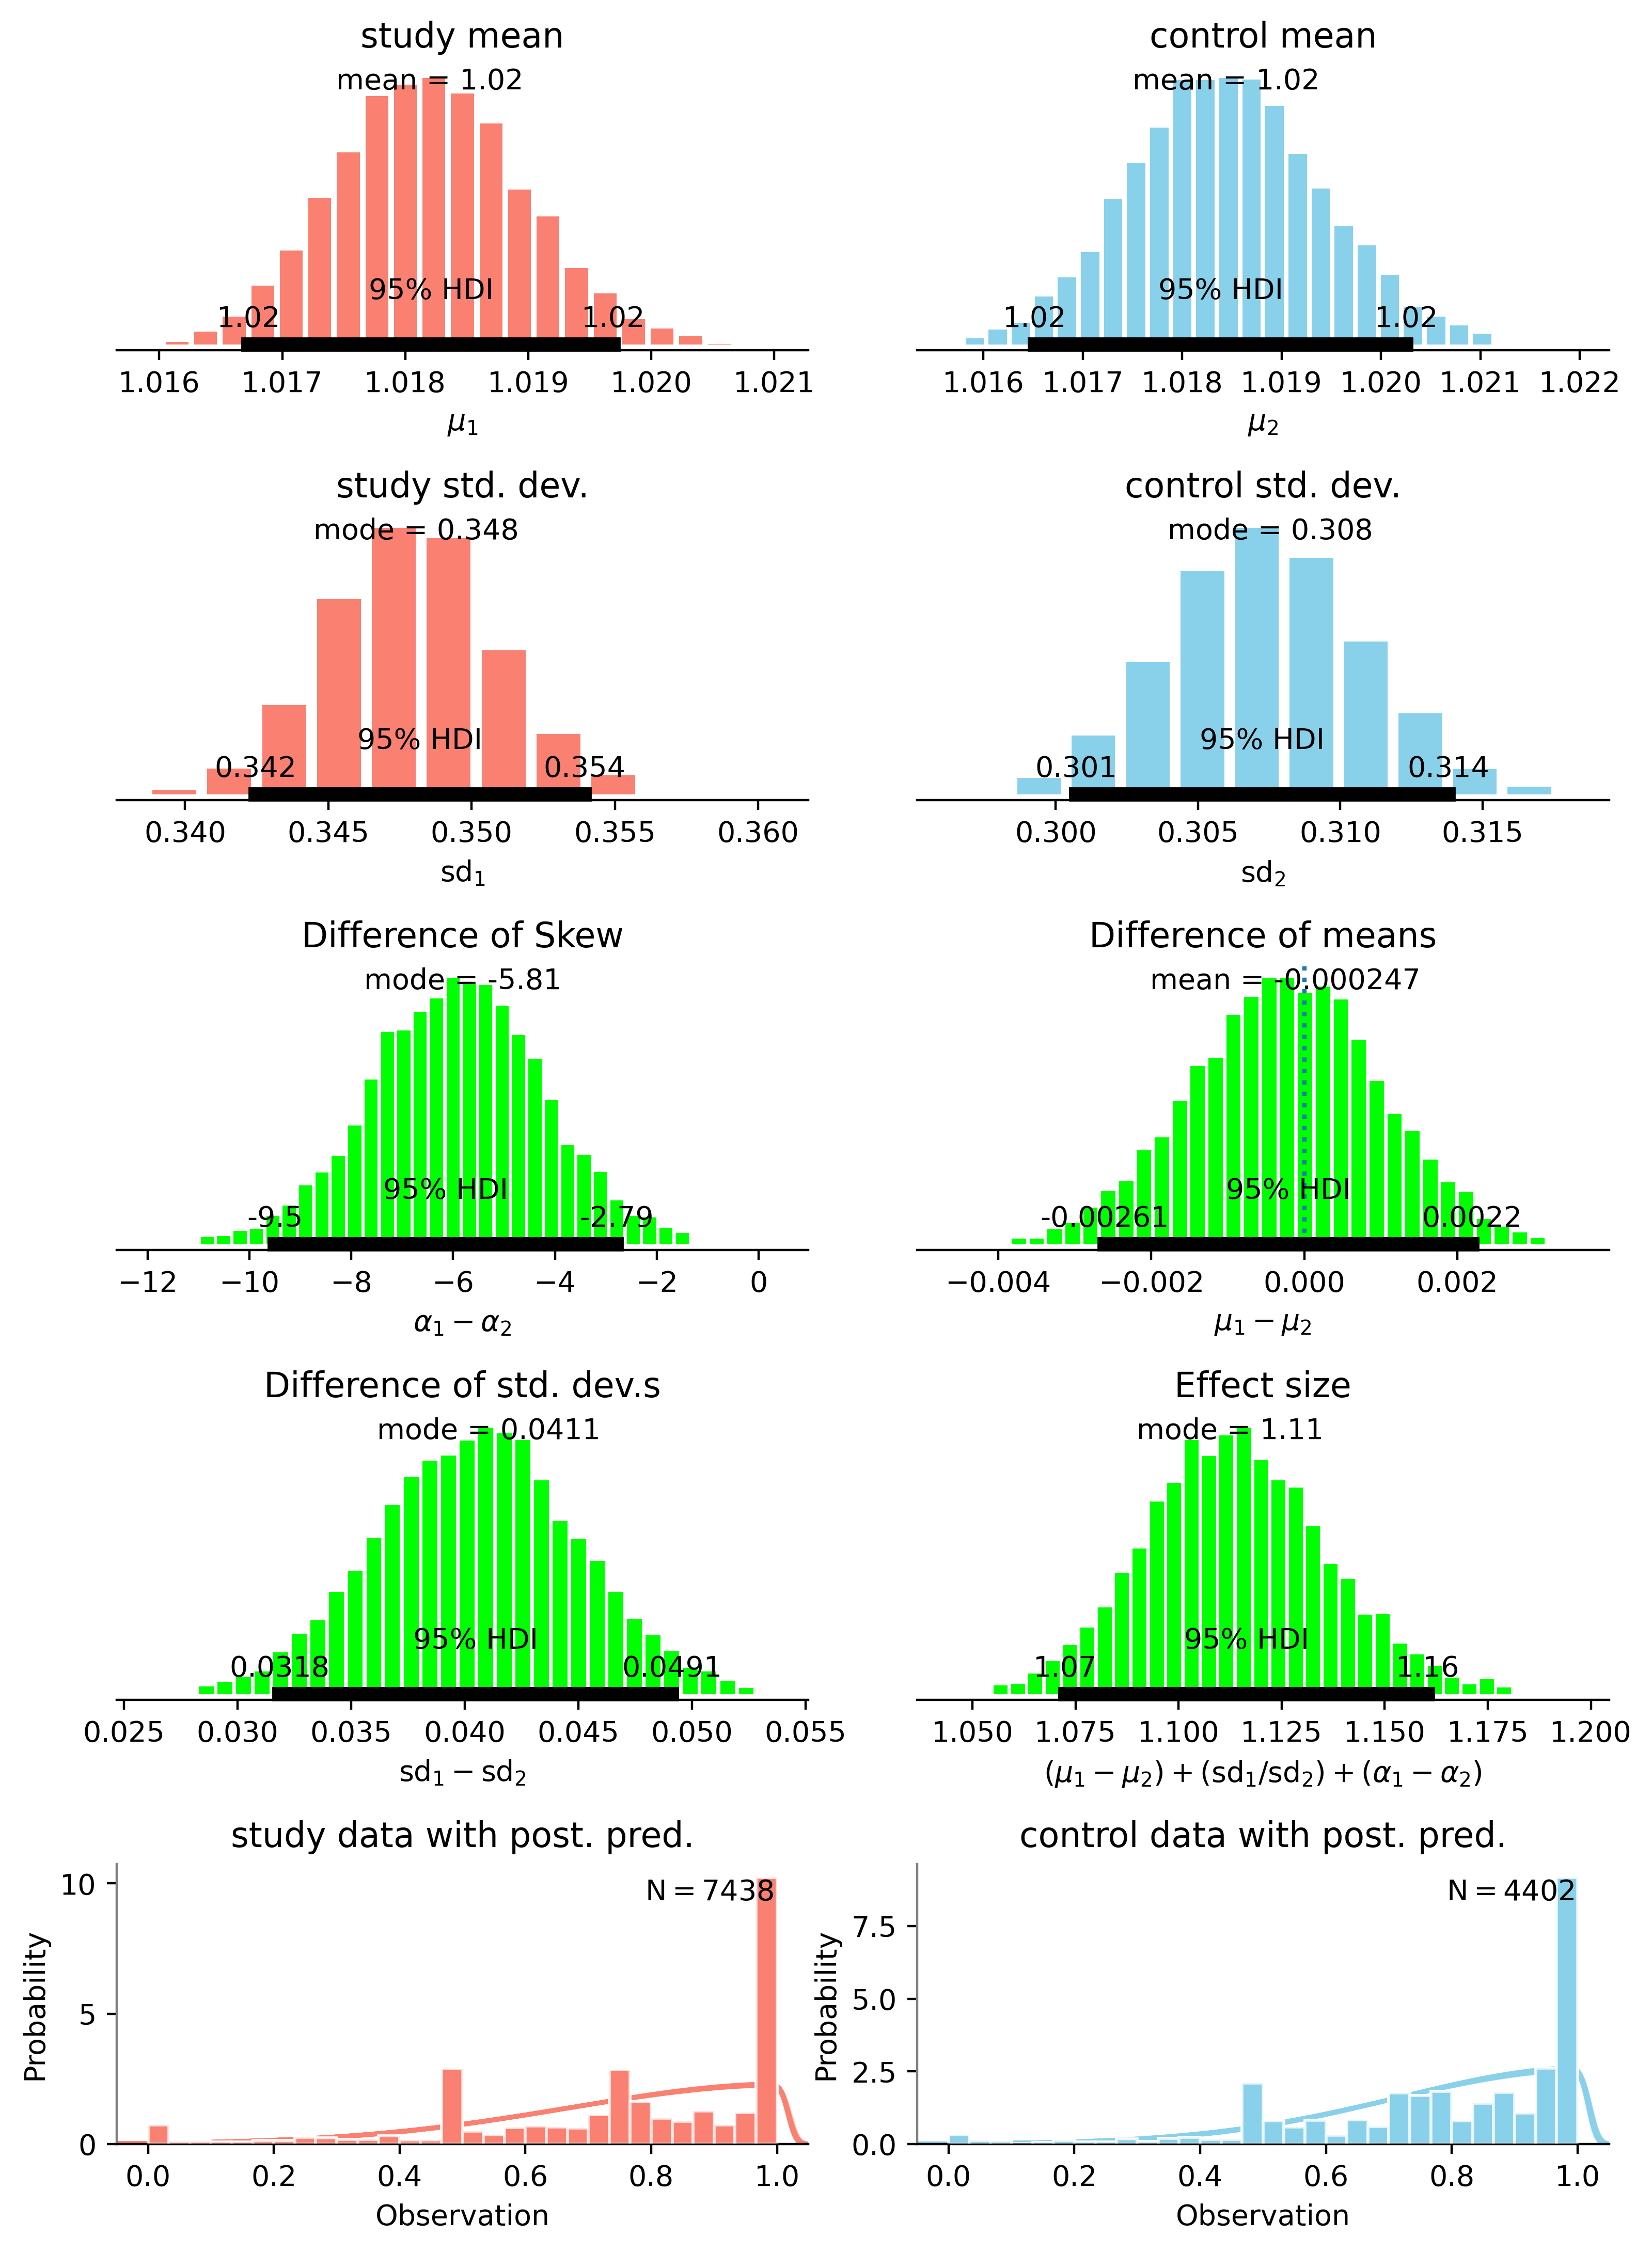

In [1]:
from bayes_test import BayesianHypothesisTestSkewNormal
import pandas as pd
import numpy as np

draws = 2000

study = np.load('group1.npy')

control = np.load('group2.npy')

study = np.max(study) - study
control = np.max(control) - control


df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestSkewNormal(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [ ]:
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

{'Group 1 mean': {'mean': 1.018191037954777,
  'hdi_min': 1.0166529263524857,
  'hdi_max': 1.0196814291053937},
 'Group 2 mean': {'mean': 1.018424850050808,
  'hdi_min': 1.0164737694395456,
  'hdi_max': 1.0201972850172607},
 'Group 1 SD': {'mode': 0.34773607133520346,
  'hdi_min': 0.3423676621744026,
  'hdi_max': 0.35372788402481004},
 'Group 2 SD': {'mode': 0.3070114353607019,
  'hdi_min': 0.3009103807215717,
  'hdi_max': 0.3136839168138283},
 'Difference of Skew': {'mode': -5.6885507378789875,
  'hdi_min': -9.49535061048358,
  'hdi_max': -2.583328855374539},
 'Difference of means': {'mean': -0.00022205905300029194,
  'hdi_min': -0.0027087483017051994,
  'hdi_max': 0.0021935313755760966},
 'Difference of SDs': {'mode': 0.04111320969253204,
  'hdi_min': 0.03201564737601126,
  'hdi_max': 0.049257518640998865},
 'Effect size': {'mode': -0.0005866731579203116,
  'hdi_min': -0.008205553910518986,
  'hdi_max': 0.006721268534361123},
 'cliff_delta': {'cliff_delta': 0.5412933544},
 'non_overl